In [67]:
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [88]:
# load the data
df = pd.read_csv('sephora_reviews_final.csv')

In [89]:
# drop the columns that is unnecessary
df = df[df.columns[~df.columns.isin(['product_id','first_submission_date','last_submission_date','brand_image_url','product_image_url'])]]

## 1. Product Features

### 1.1 Coverage

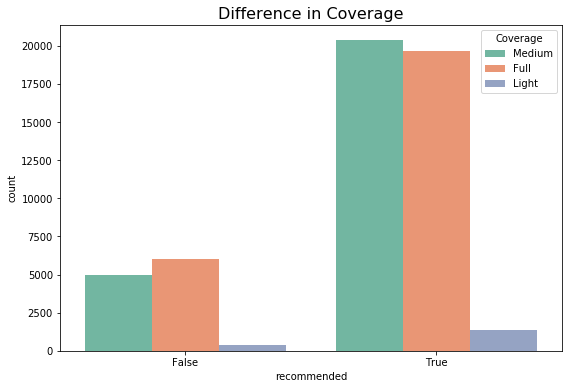

In [125]:
plt.figure(figsize=(9,6))
sns.countplot(x="recommended", hue="coverage", data=df,palette=("Set2"))
plt.title('Difference in Coverage', fontsize=16)
plt.legend(loc='upper right', title="Coverage")
plt.savefig('coverage.png')

### 1.2 Finish

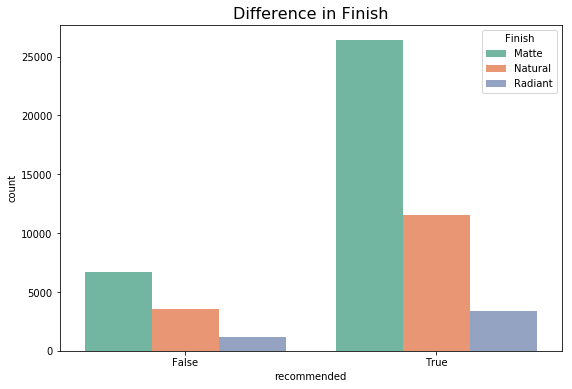

In [126]:
plt.figure(figsize=(9,6))
sns.countplot(x="recommended", hue="finish", data=df,palette=("Set2"))
plt.title('Difference in Finish', fontsize=16)
plt.legend(loc='upper right', title="Finish")
plt.savefig('finish.png')

### 1.3 Formulation

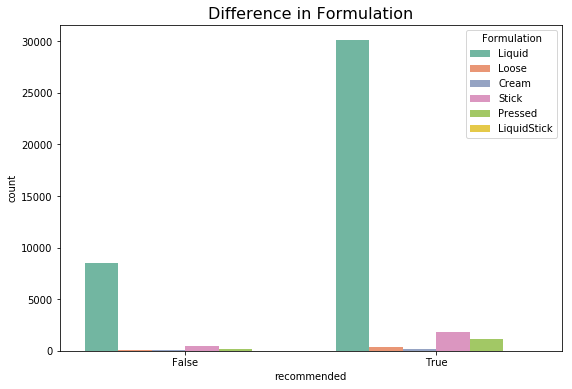

In [127]:
plt.figure(figsize=(9,6))
sns.countplot(x="recommended", hue="formulation", data=df, palette=("Set2"))
plt.title('Difference in Formulation', fontsize=16)
plt.legend(loc='upper right', title="Formulation")
plt.savefig('formulation.png')

### 1.4 Price

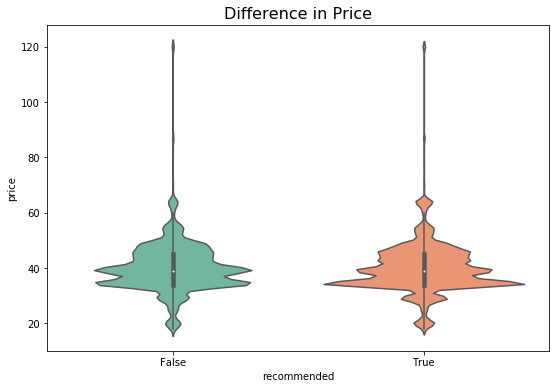

In [128]:
plt.figure(figsize=(9,6))
sns.violinplot(x="recommended", y="price", data=df, palette=("Set2"))
plt.title('Difference in Price', fontsize=16)
plt.savefig('price.png')

## 2. Consumer Characteristic

### 2.1 Skin Type

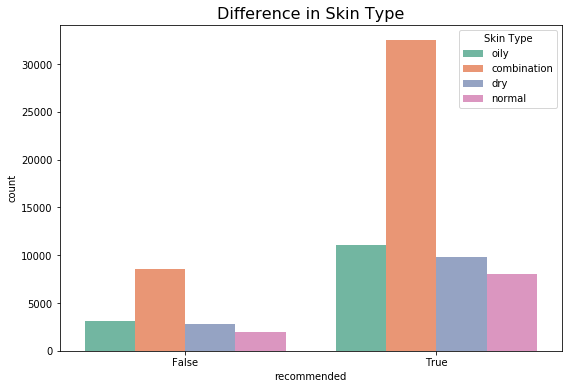

In [129]:
plt.figure(figsize=(9,6))
sns.countplot(x="recommended", hue="skin_type", data=df, palette=("Set2"))
plt.title('Difference in Skin Type', fontsize=16)
plt.legend(loc='upper right', title="Skin Type")
plt.savefig('skin_type.png')

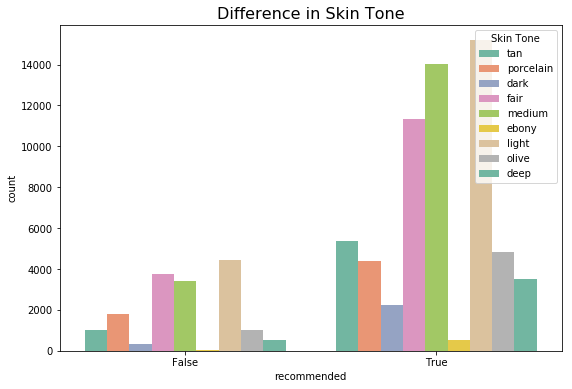

In [130]:
plt.figure(figsize=(9,6))
sns.countplot(x="recommended", hue="skin_tone", data=df, palette=("Set2"))
plt.title('Difference in Skin Tone', fontsize=16)
plt.legend(loc='upper right', title="Skin Tone")
plt.savefig('skin_tone.png')

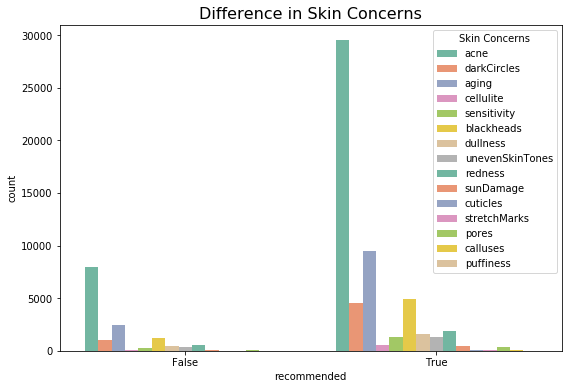

In [131]:
plt.figure(figsize=(9,6))
sns.countplot(x="recommended", hue="skin_concerns", data=df, palette=("Set2"))
plt.title('Difference in Skin Concerns', fontsize=16)
plt.legend(loc='upper right', title="Skin Concerns")
plt.savefig('skin_concerns.png')

In [141]:
age_group = ['13to17', '18to24', '25to34', '35to44', '45to54', 'over54']

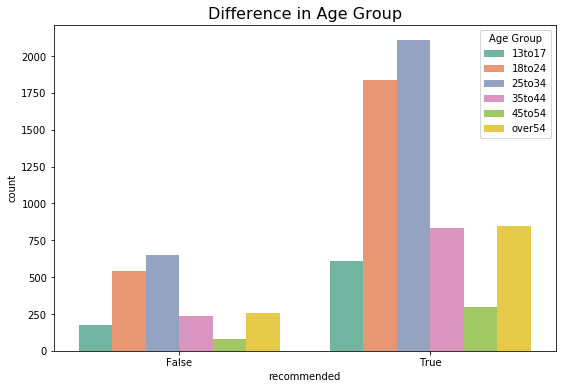

In [144]:
plt.figure(figsize=(9,6))
sns.countplot(x="recommended", hue="age", data=df, palette=("Set2"), hue_order=age_group)
plt.title('Difference in Age Group', fontsize=16)
plt.legend(loc='upper right', title="Age Group")
plt.savefig('age.png')

## 3. Review

In [196]:
stopwords = set(STOPWORDS)
stopwords.update(['foundation','skin', 'make', 'product', 'face', 
                  'really', 'work', 'use', 'tried', 'got', 'say', 'actually',
                 'using', 'used', 'one', 'two', 'three', 'four','five', 'definitely', 'absolutely',
                 'bought', 'found', 'still', 'makeup', 'made', 'look', 'feel', 'will', 'though',
                 'little', 'find', 'seem', 'looked','much', 'lot', 'even', 'love', 'return', 'however','also',
                  'always','around','bit','ever','every','feels','first','get','give','gives','go','goes','lasts','put',
                  'received','since','way','wanted','would','without','sephora','think','beautiful','beauty','blends',
                  'best','better','could','buy','good','great','like','looking','looks','many','perfect','usually','want',
                  'felt','loved','highly', 'recommend','coverage','well','full','foundations','wear','color'])   

In [189]:
recommend_text = ''
recommend = df[(df['rating'] == 5) & df['recommended'] == 1][['recommended','review_text']]
recommend.dropna()
recommend.head()

,recommended,review_text
1,True,"As someone who is very VERY fair, I have alway..."
2,True,First purchase of a foundation of any kind. Wa...
3,True,I absolutely love this foundation! I get compl...
4,True,Love this foundation! I was using Too Faced Bo...
5,True,This foundation is great. Not only does it cov...


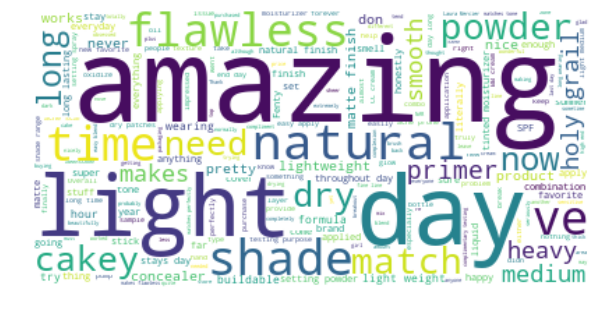

In [195]:
wordcloud1 = WordCloud(stopwords = stopwords, background_color="white").generate(' '.join(recommend['review_text']))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.gcf().set_size_inches(10,10)
plt.savefig('recommend wordcloud.png')

In [191]:
nonrecommend_text = ''
nonrecommend = df[(df['rating'] == 1)&(df['recommended'] == 0)][['recommended','review_text']]
nonrecommend.dropna()
nonrecommend.head()

,recommended,review_text
57,False,I honestly don’t understand how people make th...
59,False,I want to really love this foundation. The col...
60,False,I went to the store very excited to try this f...
69,False,"I was not a fan, horrible on dry skin. Clings ..."
87,False,I am genuinely upset about this product. I rea...


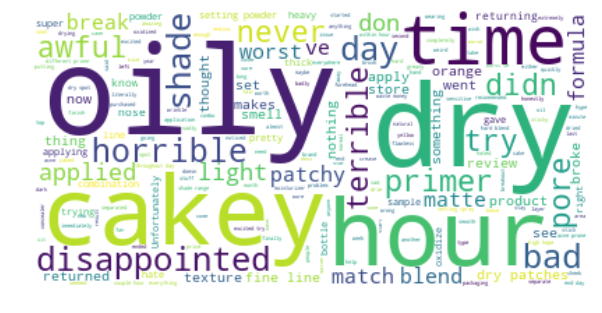

In [192]:
wordcloud2 = WordCloud(stopwords = stopwords, background_color="white").generate(' '.join(nonrecommend['review_text']))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.gcf().set_size_inches(10,10)
plt.savefig('nonrecommend wordcloud.png')